# Hacktiv8 Phase 1: Graded Challenge 2

---

Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Classification terutama Logistic Regression dan SVM.

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

![weather](https://images.ctfassets.net/hrltx12pl8hq/6TIZLa1AKeBel0yVO7ReIn/1fc0e2fd9fcc6d66b3cc733aa2547e11/weather-images.jpg?fit=fill&w=800&h=300)

### Dataset

Dataset yang digunakan pada project ini adalah dataset yang berisi tentang cuaca harian dari berbagai stasiun cuaca di Australia selama 10 tahun. Dataset ini berisi 145460 baris dengan 23 kolom yang diantaranya adalah date, location, MinTemp, MaxTemp, dan masih banyak lagi. Dataset dapat dilihat di [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package).

### Objectives

**Graded Challenge 2** ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM sebagai berikut:

- Mampu memahami konsep Classification dengan Logistic Regression dan SVM.
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM.
- Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi.

## Import Libraries

Pada project kali ini library yang akan digunakan adalah **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, **Scikit-Learn**, **Feature-Engine**, dan **Imbalanced-Learn**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from imblearn.over_sampling import SMOTE
from sklearnex import patch_sklearn

Menggunakan `patch_sklearn()` untuk mempercepat training model.

In [2]:
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Melakukan setting agar pandas menampilkan seluruh kolom pada dataframe.

In [3]:
pd.set_option('display.max_columns', None)

## Data Loading

membuat dataframe `weather` dari file `weatherAUS.csv`.

In [4]:
weather = pd.read_csv('weatherAUS.csv')

In [5]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Data Characteristics

In [6]:
weather.shape

(145460, 23)

Dataframe ini terbentuk dari:
- **145460** baris
- **23** kolom

In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Dari basic info ini dapat diketahui dataframe terbentuk dari:
- 16 kolom bertipe **float**
- 7 kolom bertipe **object**

Dapat diketahui juga terdapat ada missing value pada dataframe.

Kolom `Date` masih bertipe data **object** yang nantinya akan diubah menjadi **datetime**.

In [8]:
weather.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


Jika dilihat dari mean dan mediannya kebanyakan dari kolom numerik di dataframe memiliki distribusi yang normal contohnya pada kolom `MinTemp`, `MaxTemp`, `Temp9am`, dan `Temp3pm`. Kolom-kolom tersebuat memiliki mean dan median yang berdekatan.

## Data Cleaning

### Missing Value Check

Pada bagian ini akan dilakukan pengecekan untuk melihat apakah terdapat missing value pada dataframe.

In [9]:
weather.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [10]:
weather.isna().mean()

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

Setelah dilakukan pengecekan, hampir pada **setiap kolom terdapat missing value** dengan kolom `Sunshine` yang memiliki missing value terbanyak yaitu sekitar **48%**. Pada kolom `RainTomorrow` (target) juga terdapat sekitar **2% missing value**, maka missing value pada kolom ini akan dihapus karena jika dilakukan imputasi maka model akan benjadi bias, sedangkan untuk kolom lain akan dilakukan imputasi pada bagian **preprocessing**.

In [11]:
weather = weather[weather.RainTomorrow.notna()]
print(f'Number of missing value in RainTomorrow: {weather.isna().sum()["RainTomorrow"]}')

Number of missing value in RainTomorrow: 0


### Duplicated Data

Pada bagian ini akan dilakukan pengecekan untuk mengetahui apakah terdapat data duplikat pada dataset.

In [12]:
weather.duplicated().sum()

0

Setelah dilakukan pengecekan, **tidak terdapat duplicated data** pada dataset.

### Add Column

Akan membuat 3 kolom baru yang bernama `Day`, `Month`, `Year` yang di extract dari kolom `Date`.

In [13]:
weather['Date'] = pd.to_datetime(weather['Date'])
weather['Day'] = weather['Date'].dt.day
weather['Month'] = weather['Date'].dt.month
weather['Year'] = weather['Date'].dt.year

In [14]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


## Exploratory Data Analysis (EDA)

### RainTomorrow (Target Column)

In [15]:
print(f'Number of unique values in RainTomorrow column: {weather.RainTomorrow.nunique()}')
print(f'Unique values in RainTomorrow column: {weather.RainTomorrow.unique()}')

Number of unique values in RainTomorrow column: 2
Unique values in RainTomorrow column: ['No' 'Yes']


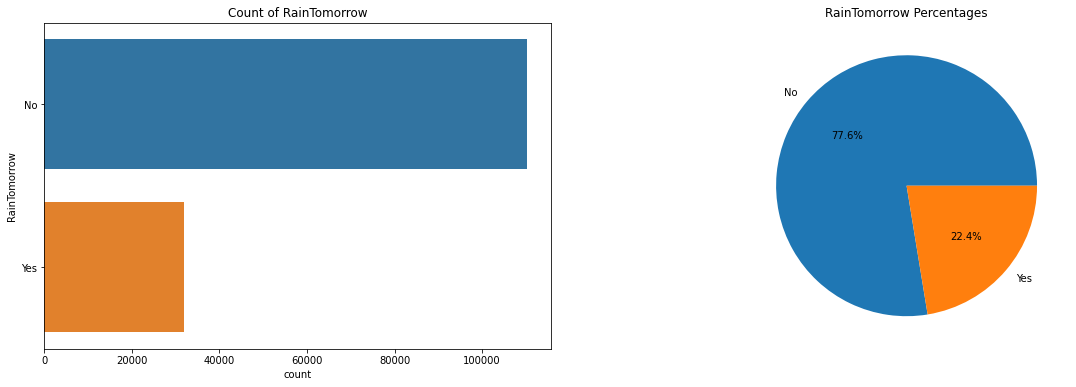

In [16]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(y='RainTomorrow', data=weather)
plt.title('Count of RainTomorrow')
plt.subplot(1, 2, 2)
plt.pie(weather.groupby('RainTomorrow').size(), labels=weather.groupby('RainTomorrow').size().index, autopct='%1.1f%%')
plt.title('RainTomorrow Percentages')
plt.show()

Kolom `RainTommorow` memiliki 2 unique value dengan 77.6% nya adalah **No** yang berjumlah **110316** dan 22.4% nya adalah **Yes** yang berjumlah **31877**.

### Date

In [17]:
print(f'Earliest date: {weather.Date.min().strftime("%B %d, %Y")}')
print(f'Latest date: {weather.Date.max().strftime("%B %d, %Y")}')

Earliest date: November 01, 2007
Latest date: June 25, 2017


Dataset ini mencatat data cuaca selama 10 tahun dari **1 November 2017** sampai **25 Juni 2017**.

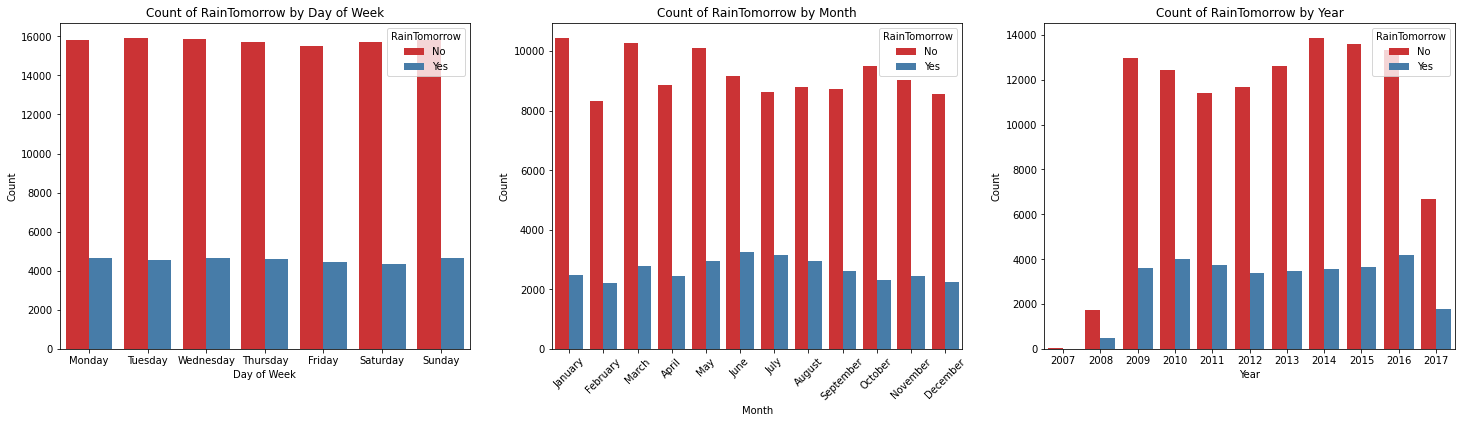

In [18]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.countplot(x=weather.Date.dt.dayofweek, data=weather, palette='Set1', hue='RainTomorrow')
plt.title('Count of RainTomorrow by Day of Week')
plt.xlabel('Day of Week')
plt.xticks(np.arange(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Count')
plt.subplot(1, 3, 2)
sns.countplot(x='Month', data=weather, palette='Set1', hue='RainTomorrow')
plt.title('Count of RainTomorrow by Month')
plt.xlabel('Month')
plt.xticks(np.arange(0, 12), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.ylabel('Count')
plt.subplot(1, 3, 3)
sns.countplot(x='Year', data=weather, palette='Set1', hue='RainTomorrow')
plt.title('Count of RainTomorrow by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Jika dilihat dari count plot diatas, stasiun cuaca lebih banyak mempredisi akan hujan pada bulan Mei hingga July mungkin hal ini disebabkan karena pada bulan-bulan tersebut di Australia sedang terjadi perpindahan musim dari **musim gugur ke musim dingin**. 

### Location

In [19]:
print(f'Number of unique values in Location column: {weather.Location.nunique()}')
print(f'Unique values in Location column: \n{weather.Location.unique()}')

Number of unique values in Location column: 49
Unique values in Location column: 
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


Dataset ini mencatat cuaca dari **49 kota** yang berada di Australia.

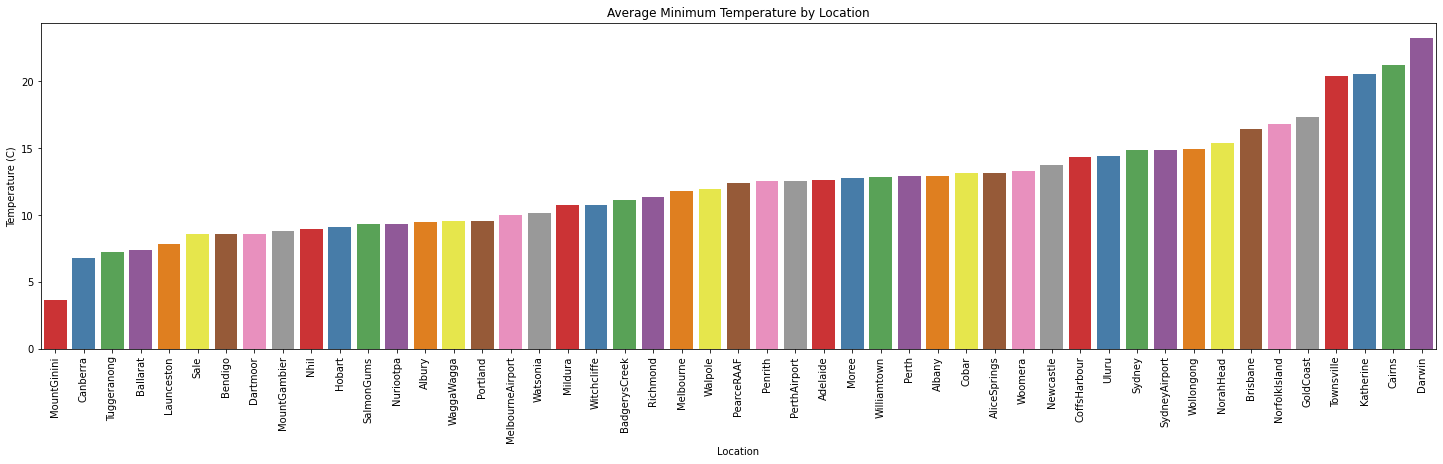

In [20]:
plt.figure(figsize=(25, 6))
sns.barplot(x=weather.groupby('Location').MinTemp.mean().sort_values().index, y=weather.groupby('Location').MinTemp.mean().sort_values().values, palette='Set1')
plt.title('Average Minimum Temperature by Location')
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.ylabel('Temperature (C)')
plt.show()

In [21]:
weather.groupby('Location').MinTemp.mean().sort_values().head(3)

Location
MountGinini    3.651193
Canberra       6.827688
Tuggeranong    7.245612
Name: MinTemp, dtype: float64

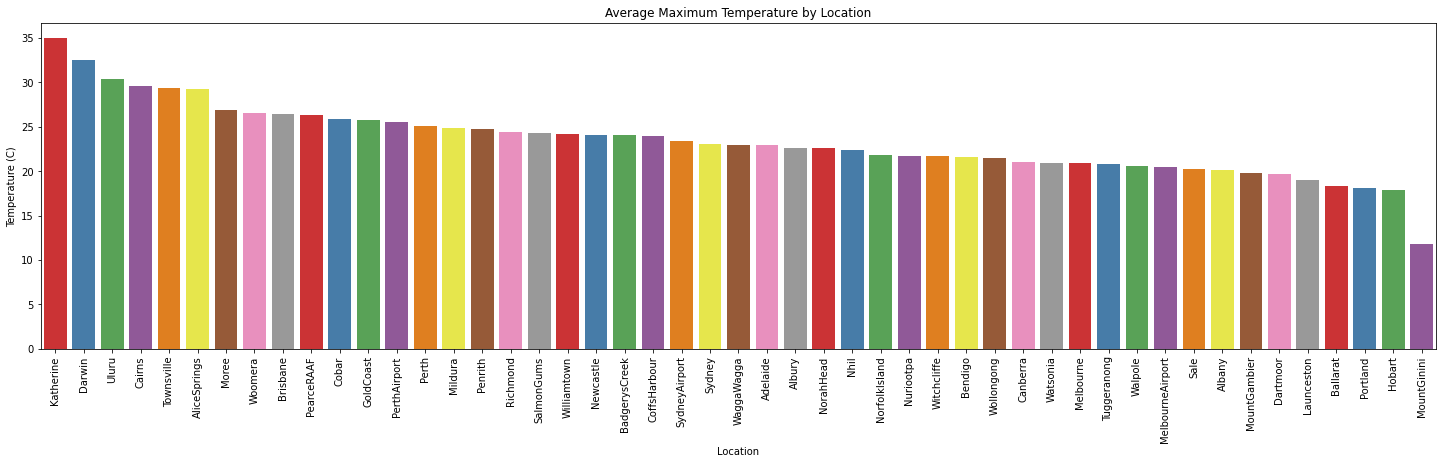

In [22]:
plt.figure(figsize=(25, 6))
sns.barplot(x=weather.groupby('Location').MaxTemp.mean().sort_values(ascending=False).index, y=weather.groupby('Location').MaxTemp.mean().sort_values(ascending=False).values, palette='Set1')
plt.title('Average Maximum Temperature by Location')
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.ylabel('Temperature (C)')
plt.show()

In [23]:
weather.groupby('Location').MaxTemp.mean().sort_values(ascending=False).head(3)

Location
Katherine    34.939037
Darwin       32.540977
Uluru        30.387442
Name: MaxTemp, dtype: float64

Di Australia lokasi dengan rata-rata minimum temperature **paling rendah** adalah:
- Mount Ginini **3.6°C**
- Canberra **6.8°C**
- Tuggeranong **7.2°C**

Sedangkan lokasi dengan rata-rata maximum temperature **paling tinggi** adalah:
- Katherine **34.9°C**
- Darwin **32.5°C**
- Uluru **30.4°C**

### MinTemp & MaxTemp

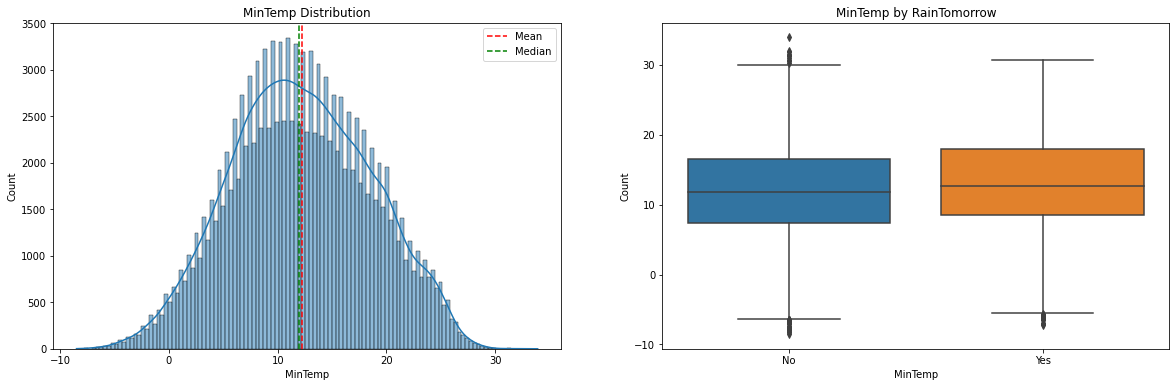

Skewness: 0.02389982065241537
Mean: 12.186399728729265
Median: 12.0


In [24]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='MinTemp', data=weather, kde=True)
plt.axvline(weather.MinTemp.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(weather.MinTemp.median(), color='green', linestyle='--', label='Median')
plt.title('MinTemp Distribution')
plt.xlabel('MinTemp')
plt.ylabel('Count')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='RainTomorrow', y='MinTemp', data=weather)
plt.title('MinTemp by RainTomorrow')
plt.xlabel('MinTemp')
plt.ylabel('Count')
plt.show()
print(f'Skewness: {weather.MinTemp.skew()}')
print(f'Mean: {weather.MinTemp.mean()}')
print(f'Median: {weather.MinTemp.median()}')

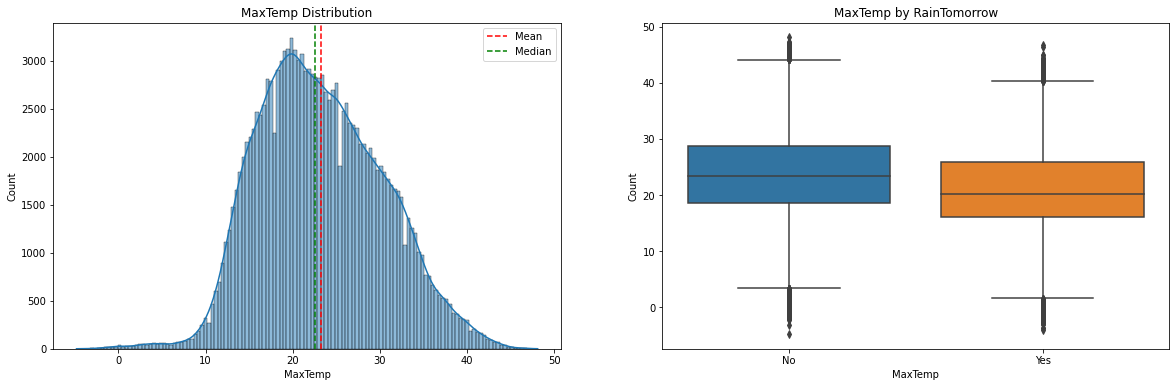

Skewness: 0.22491661455913778
Mean: 23.226784191272355
Median: 22.6


In [25]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='MaxTemp', data=weather, kde=True)
plt.axvline(weather.MaxTemp.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(weather.MaxTemp.median(), color='green', linestyle='--', label='Median')
plt.title('MaxTemp Distribution')
plt.xlabel('MaxTemp')
plt.ylabel('Count')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='RainTomorrow', y='MaxTemp', data=weather)
plt.title('MaxTemp by RainTomorrow')
plt.xlabel('MaxTemp')
plt.ylabel('Count')
plt.show()
print(f'Skewness: {weather.MaxTemp.skew()}')
print(f'Mean: {weather.MaxTemp.mean()}')
print(f'Median: {weather.MaxTemp.median()}')

Kolom `MinTemp` dan `MaxTemp` memiliki **distribusi normal** (symmetric) karena nilai skewness kedua kolom ini berada di antara -0.5 dan 0.5 lalu jika dilihat dari box plot kedua kolom ini sepertinya `MinTemp` dan `MaxTemp` memiliki korelasi yang lemah terhadap kolom `RainTomorrow`.

In [26]:
print(f'Coldest temperature is {weather.MinTemp.min()}°C on {weather[weather.MinTemp == weather.MinTemp.min()].Date.dt.strftime("%B %d, %Y").to_string(index=False)} ({weather[weather.MinTemp == weather.MinTemp.min()].Location.to_string(index=False)})')
print(f'Hottest temperature is {weather.MaxTemp.max()}°C on {weather[weather.MaxTemp == weather.MaxTemp.max()].Date.dt.strftime("%B %d, %Y").to_string(index=False)} ({weather[weather.MaxTemp == weather.MaxTemp.max()].Location.to_string(index=False)})')

Coldest temperature is -8.5°C on June 11, 2009 (MountGinini)
Hottest temperature is 48.1°C on January 25, 2011 (Woomera)


Di Australia, suhu terendah yang tercatat adalah **-8.5°C** pada 11 Juni 2009 di **Mount Ginini** yang mana pada bulan tersebut sedang berada pada musim dingin dan suhu tertinggi berada di **Woomera** pada musim panas 25 January 2011 yaitu **48.1°C**.

### RainToday

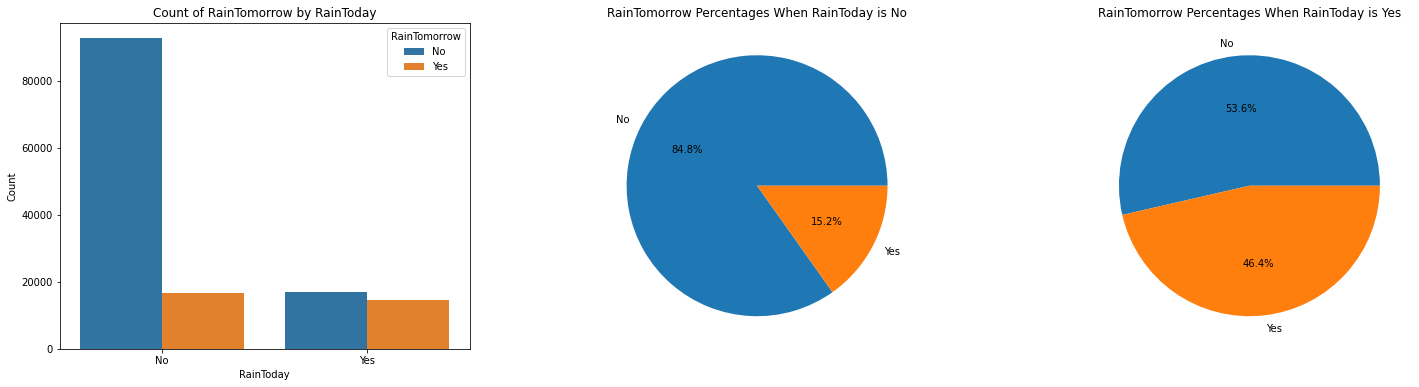

In [27]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='RainToday', data=weather, hue='RainTomorrow')
plt.title('Count of RainTomorrow by RainToday')
plt.xlabel('RainToday')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.pie(weather[weather.RainToday == 'No'].RainTomorrow.value_counts(), labels=weather[weather.RainToday == 'No'].RainTomorrow.value_counts().index, autopct='%1.1f%%')
plt.title('RainTomorrow Percentages When RainToday is No')
plt.subplot(1, 3, 3)
plt.pie(weather[weather.RainToday == 'Yes'].RainTomorrow.value_counts(), labels=weather[weather.RainToday == 'Yes'].RainTomorrow.value_counts().index, autopct='%1.1f%%')
plt.title('RainTomorrow Percentages When RainToday is Yes')
plt.show()

Dapat diketahui dari plot diatas, jika tidak terjadi hujan pada hari ini maka **sangat jarang** stasiun cuaca memprediksi akan terjadi hujan pada esok harinya hanya sekitar **15.2%** saja, sedangkan jika terjadi hujan pada hari ini stasiun cuaca **sering** memprediksi bahwa esok harinya akan hujan sekitar **46%**.

### Correlation Between Numeric Column To RainTomorrow

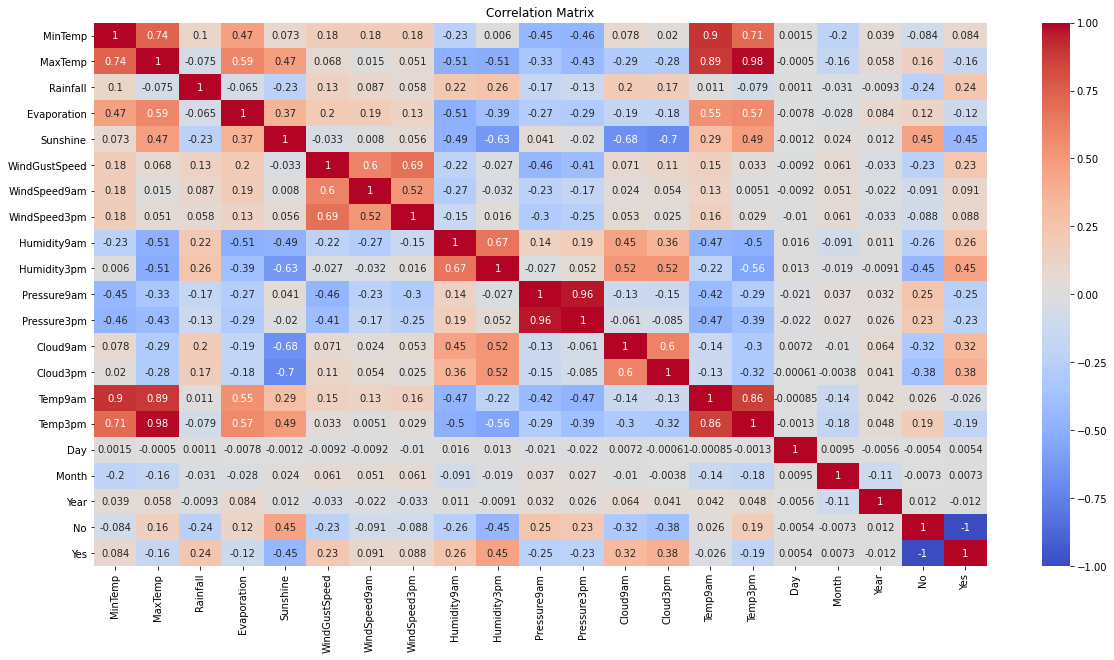

In [28]:
corr = pd.concat([weather, pd.get_dummies(weather.RainTomorrow)], axis=1).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dari heatmap diatas, kolom RainTomorrow memiliki korelasi dengan beberapa kolom namun saya akan hanya menggunakan kolom-kolom yang nilai correlationnya lebih dari 0.20 saja. Maka kolom numerik yang akan digunakan sebagai feature adalah kolom `RainFall`, `Sunshine`, `WindGustSpeed`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, Cloud9am, dan `Cloud3pm`.

Kolom numerik lain yang tidak akan digunakan sebagai features akan **dihilangkan dari dataframe**.

In [29]:
weather = weather.drop(columns=['MinTemp', 'MaxTemp', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year', 'Date'])

In [30]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   Rainfall       140787 non-null  float64
 2   Sunshine       74377 non-null   float64
 3   WindGustDir    132863 non-null  object 
 4   WindGustSpeed  132923 non-null  float64
 5   WindDir9am     132180 non-null  object 
 6   WindDir3pm     138415 non-null  object 
 7   Humidity9am    140419 non-null  float64
 8   Humidity3pm    138583 non-null  float64
 9   Pressure9am    128179 non-null  float64
 10  Pressure3pm    128212 non-null  float64
 11  Cloud9am       88536 non-null   float64
 12  Cloud3pm       85099 non-null   float64
 13  RainToday      140787 non-null  object 
 14  RainTomorrow   142193 non-null  object 
dtypes: float64(9), object(6)
memory usage: 17.4+ MB


Sekarang dataframe hanya memiliki **14 kolom**.

### Correlation Between Categorical Column To RainTomorrow

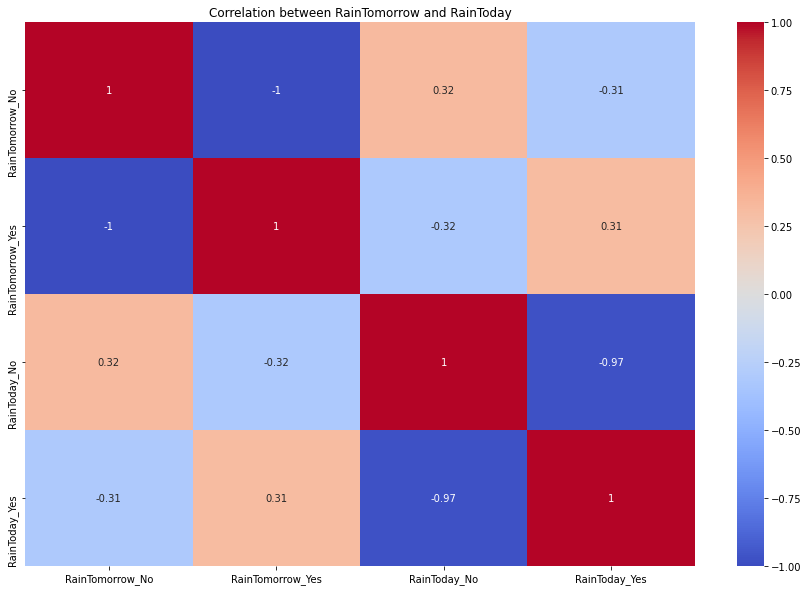

In [31]:
plt.figure(figsize=(15, 10))
corr_cat = pd.get_dummies(weather[['RainTomorrow', 'RainToday']]).corr()
sns.heatmap(corr_cat, cmap='coolwarm', annot=True)
plt.title('Correlation between RainTomorrow and RainToday')
plt.show()

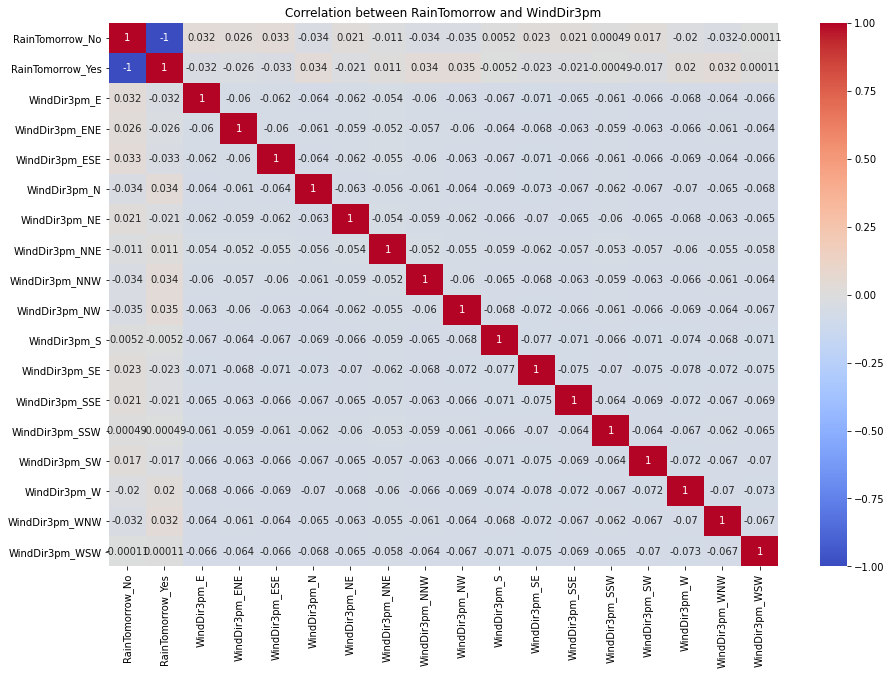

In [32]:
plt.figure(figsize=(15, 10))
corr_cat = pd.get_dummies(weather[['RainTomorrow', 'WindDir3pm']]).corr()
sns.heatmap(corr_cat, cmap='coolwarm', annot=True)
plt.title('Correlation between RainTomorrow and WindDir3pm')
plt.show()

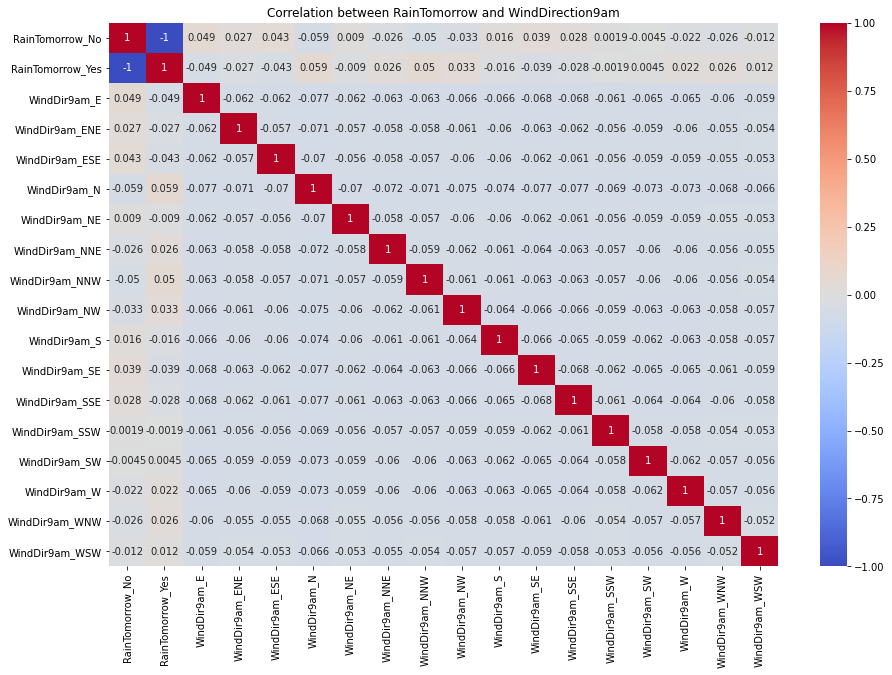

In [33]:
plt.figure(figsize=(15, 10))
corr_cat = pd.get_dummies(weather[['RainTomorrow', 'WindDir9am']]).corr()
sns.heatmap(corr_cat, cmap='coolwarm', annot=True)
plt.title('Correlation between RainTomorrow and WindDirection9am')
plt.show()

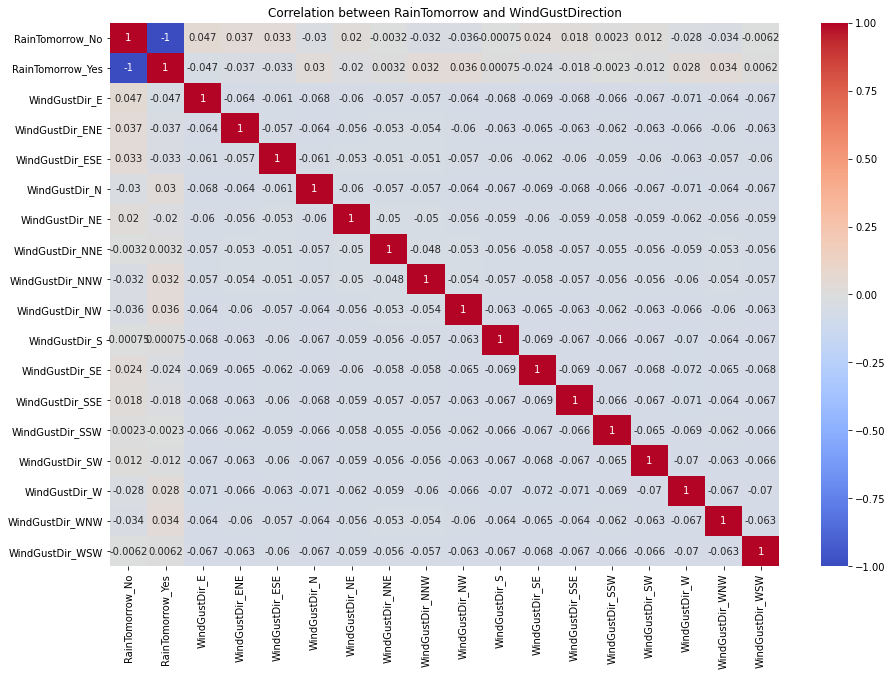

In [34]:
plt.figure(figsize=(15, 10))
corr_cat = pd.get_dummies(weather[['RainTomorrow', 'WindGustDir']]).corr()
sns.heatmap(corr_cat, cmap='coolwarm', annot=True)
plt.title('Correlation between RainTomorrow and WindGustDirection')
plt.show()

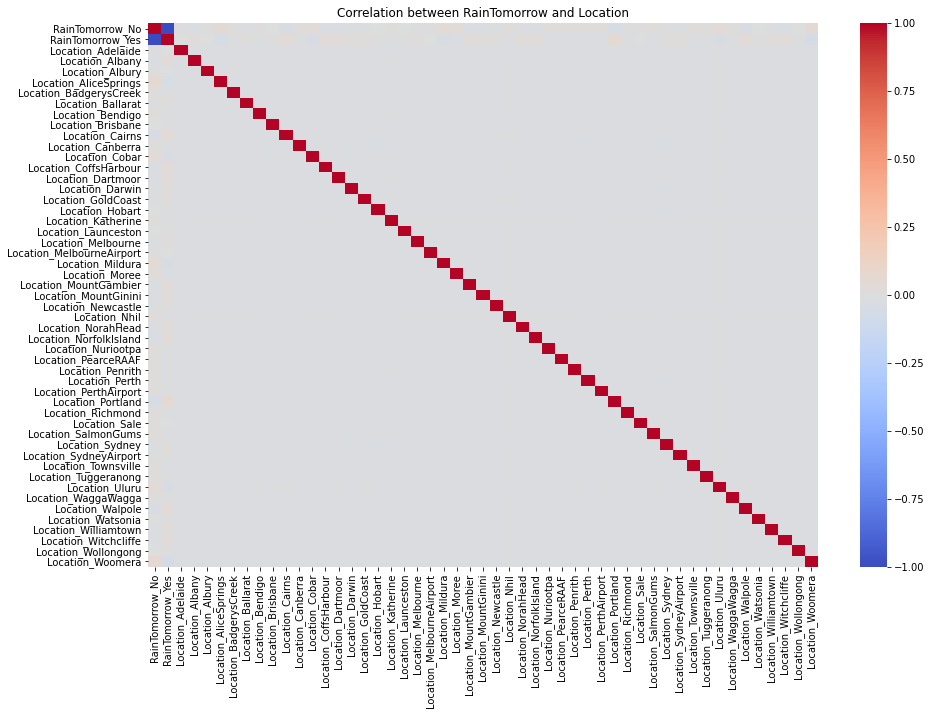

In [35]:
plt.figure(figsize=(15, 10))
corr_cat = pd.get_dummies(weather[['RainTomorrow', 'Location']]).corr()
sns.heatmap(corr_cat, cmap='coolwarm')
plt.title('Correlation between RainTomorrow and Location')
plt.show()

Jika dilihat dari 5 kolom yang bertipe data kategori ini, sepertinya kolom `RainTomorrow` hanya memiliki korelasi dengan kolom `RainToday` saja. Maka, semua kolom kategori akan dihapus dari dataframe kecuali kolom `RainToday`.

In [36]:
weather = weather.drop(columns=['Location', 'WindDir9am', 'WindDir3pm', 'WindGustDir'])

In [37]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Rainfall       140787 non-null  float64
 1   Sunshine       74377 non-null   float64
 2   WindGustSpeed  132923 non-null  float64
 3   Humidity9am    140419 non-null  float64
 4   Humidity3pm    138583 non-null  float64
 5   Pressure9am    128179 non-null  float64
 6   Pressure3pm    128212 non-null  float64
 7   Cloud9am       88536 non-null   float64
 8   Cloud3pm       85099 non-null   float64
 9   RainToday      140787 non-null  object 
 10  RainTomorrow   142193 non-null  object 
dtypes: float64(9), object(2)
memory usage: 13.0+ MB


Setelah dilakukan penghapusan pada kolom-kolom kategori yang tidak berkorelasi dengan kolom `RainTomorrow`, sekarang tersisa **10 kolom** yang mana 9 kolom kolom diantaranya akan menjadi features untuk nantinya akan dilatih pada model.

## Data Preprocessing

### Split Data

Pada bagian ini akan dilakukan **splitting** terhadap dataset untuk dijadikan training, validation, dan testing set dengan perbandingan **7:2:1**, dimana:
- 70% data menjadi **training set**
- 20% data menjadi **validation set**
- 10% data menjadi **testing set**

Dan pada splitting ini akan menggunakan parameter `stratify` untuk menjaga proporsi dari label.

In [38]:
df_train_val, df_test = train_test_split(weather, test_size=0.1, random_state=23, stratify=weather.RainTomorrow)
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=23, stratify=df_train_val.RainTomorrow)

In [39]:
print(f'df_train proportion: {len(df_train) / len(weather):.1f}')
print(f'df_val proportion: {len(df_val) / len(weather):.1f}')
print(f'df_test proportion: {len(df_test) / len(weather):.1f}')

df_train proportion: 0.7
df_val proportion: 0.2
df_test proportion: 0.1


### Missing Value Handling

Karena hampir dari semua kolom pada dataframe memiliki missing value, maka pada bagian ini akan dilakukan **missing value imputation** berdasarkan `df_train`.

**NOTE**: kolom `RainTomorrow` tidak akan dilakukan imputasi karena akan menjadi kolom target dan semua baris yang memiliki missing value pada kolom ini sudah dihapus pada bagian **data cleaning**.

In [40]:
print('----df_train before imputation----')
print(df_train.isna().sum())
print('----df_val before imputation----')
print(df_val.isna().sum())
print('----df_test before imputation----')
print(df_test.isna().sum())

----df_train before imputation----
Rainfall          1002
Sunshine         48797
WindGustSpeed     6694
Humidity9am       1287
Humidity3pm       2625
Pressure9am      10121
Pressure3pm      10109
Cloud9am         38621
Cloud3pm         41100
RainToday         1002
RainTomorrow         0
dtype: int64
----df_val before imputation----
Rainfall           249
Sunshine         12212
WindGustSpeed     1650
Humidity9am        308
Humidity3pm        614
Pressure9am       2492
Pressure3pm       2474
Cloud9am          9660
Cloud3pm         10271
RainToday          249
RainTomorrow         0
dtype: int64
----df_test before imputation----
Rainfall          155
Sunshine         6807
WindGustSpeed     926
Humidity9am       179
Humidity3pm       371
Pressure9am      1401
Pressure3pm      1398
Cloud9am         5376
Cloud3pm         5723
RainToday         155
RainTomorrow        0
dtype: int64


Sebelum melakukan imputasi, akan dibuat variable yang berisi list dari nama-nama kolom dimana:
- `num_cols` adalah list yang berisi nama dari kolom **numerik**
- `cat_cols` adalah list yang berisi nama dari kolom **kategori**

In [41]:
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns # Numerical columns
cat_cols = df_train.select_dtypes(include=['object']).columns # Categorical columns

Membuat **2 imputer** untuk masing-masing tipe data:
- `num_imputer` digunakan untuk melakukan imputasi missing value berdasarkan **median** dari `df_train`
- `cat_imputer` digunakan untuk melakukan imputasi missing value berdasarkan **modus** dari `df_train`

In [42]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

Melakukan imputasi pada kolom-kolom yang memiliki missing value menggunakan `num_imputer` dan `cat_imputer` untuk setiap dataframe berdasarkan `df_train`.

In [43]:
# df_train imputation
df_train_num_no_na = num_imputer.fit_transform(df_train[num_cols])
df_train_cat_no_na = cat_imputer.fit_transform(df_train[cat_cols])

# df_val imputation
df_val_num_no_na = num_imputer.transform(df_val[num_cols])
df_val_cat_no_na = cat_imputer.transform(df_val[cat_cols])

# df_test imputation
df_test_num_no_na = num_imputer.transform(df_test[num_cols])
df_test_cat_no_na = cat_imputer.transform(df_test[cat_cols])

Menggabungkan kembali kolom numerik dan kategori yang sudah melewati imputasi menjadi `df_train`, `df_val`, dan `df_test`.

In [44]:
df_train = pd.concat([pd.DataFrame(df_train_num_no_na, columns=num_cols), pd.DataFrame(df_train_cat_no_na, columns=cat_cols)], axis=1)
df_val = pd.concat([pd.DataFrame(df_val_num_no_na, columns=num_cols), pd.DataFrame(df_val_cat_no_na, columns=cat_cols)], axis=1)
df_test = pd.concat([pd.DataFrame(df_test_num_no_na, columns=num_cols), pd.DataFrame(df_test_cat_no_na, columns=cat_cols)], axis=1)

In [45]:
print('----df_train after imputation----')
print(df_train.isna().sum())
print('----df_val after imputation----')
print(df_val.isna().sum())
print('----df_test after imputation----')
print(df_test.isna().sum())

----df_train after imputation----
Rainfall         0
Sunshine         0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
RainToday        0
RainTomorrow     0
dtype: int64
----df_val after imputation----
Rainfall         0
Sunshine         0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
RainToday        0
RainTomorrow     0
dtype: int64
----df_test after imputation----
Rainfall         0
Sunshine         0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
RainToday        0
RainTomorrow     0
dtype: int64


Setelah dilakukan imputasi pada setiap dataframe, sekarang **sudah tidak lagi terdapat missing value** pada kolom-kolom dataframe.

### Outlier Handling

Pada bagian ini akan dilakukan outliers handling pada `df_train`

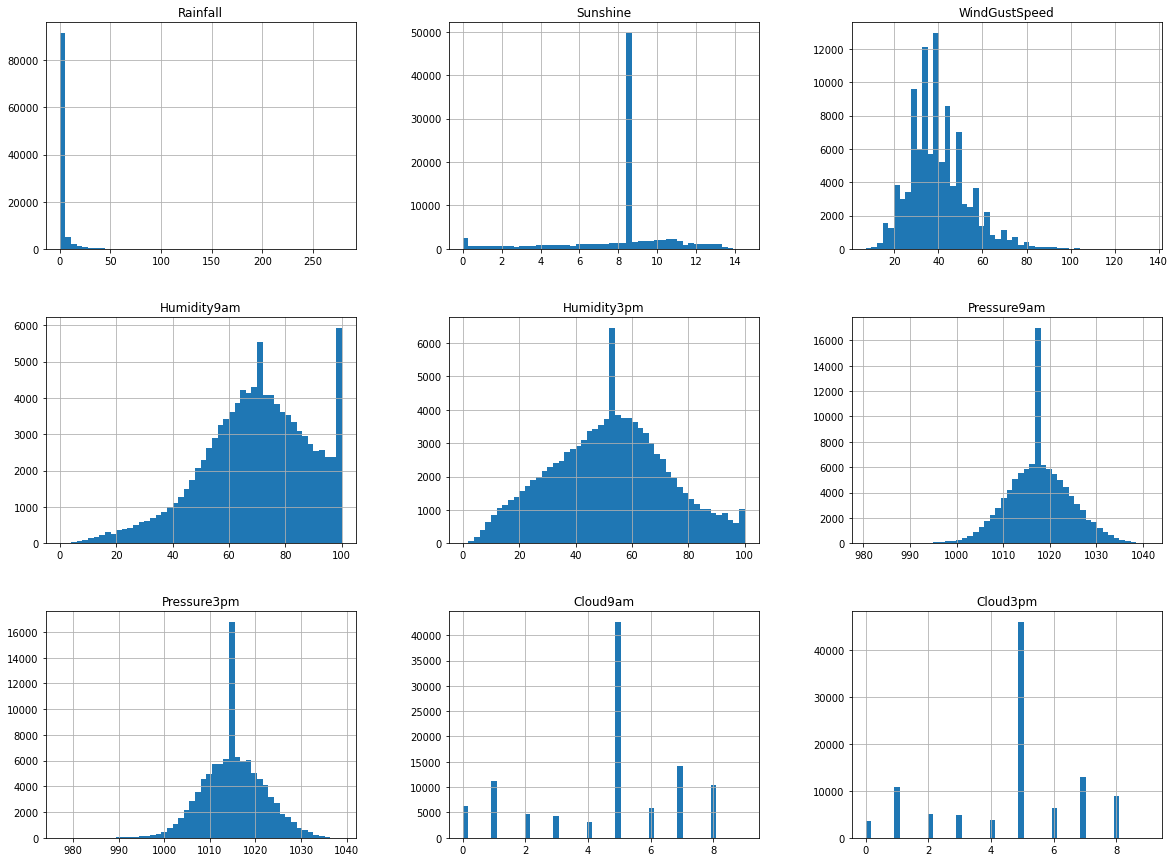

In [46]:
df_train.hist(bins=50, figsize=(20, 15))
plt.show()

In [47]:
df_train.shape

(102378, 11)

Jika dilihat dari histogramnya kolom-kolom yang memiliki outlier adalah `Rainfall`, `WindGustSpeed`, `Pressure9am`, dan `Pressure3pm`. Karena jumlah baris pada `df_train` hanya berjumlah **102378 baris** jika outlier dihapus dikhawatirkan akan membuat train set ini menjadi sedikit, maka outlier akan ditangani dengan metode **capping**. Dan karena kolom-kolom ini memiliki distribusi yang berbeda maka penanganannya juga akan berbeda, dimana:
- `Rainfall` dan `WindGustSpeed` memiliki distribusi yang **Skewed** maka akan dilakukan capping menggunakan **IQR**
- `Pressure9am` dan `Pressure3pm` memiliki distribusi yang cenderung **Normal** maka akan dilakukan capping menggunakan **3 Standard Deviation**

**NOTE**: Setelah dilakukan beberapa kali percobaan dengan menghapus outlier dan capping outlier, model mengalami **overfit** sehingga **outlier akan dibiarkan**. 

### Feature Selection

Berdasarkan hasil EDA, kolom `RainTomorrow` berkorelasi dengan kolom `Rainfall`, `Sunshine`, `WindGustSpeed`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, dan `RainToday`. Maka, 9 kolom tersebut akan menjadi feature yang akan dilatih pada model dengan kolom `RainTomorrow` sebagai target labelnya.

Sebelum features dan label dipisahkan, akan dilakukan pemetaan pada kolom `RainToday` dan `RainTomorrow` menjadi 0 dan 1, dimana:
- **No** akan menjadi **0**
- **Yes** akan menjadi **1**

In [48]:
# df_train
df_train['RainTomorrow'] = df_train['RainTomorrow'].map({'Yes': 1, 'No': 0})
df_train['RainToday'] = df_train['RainToday'].map({'Yes': 1, 'No': 0})

# df_val
df_val['RainTomorrow'] = df_val['RainTomorrow'].map({'Yes': 1, 'No': 0})
df_val['RainToday'] = df_val['RainToday'].map({'Yes': 1, 'No': 0})

Selanjutnya memisahkan **features** dan **label** dari `df_train` dan `df_val`.

In [49]:
X_train = df_train.drop(columns=['RainTomorrow']) # Features
y_train = df_train['RainTomorrow'] # Target

X_val = df_val.drop(columns=['RainTomorrow']) # Features
y_val = df_val['RainTomorrow'] # Target

### Feature Scaling

Pada bagian ini akan dilakukan scaling terhadap semua features pada `df_train` dan `df_val` kecuali kolom `RainToday` karena kolom ini adalah kolom **kategori binary**.

In [50]:
scaler = StandardScaler()

In [51]:
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['RainToday']))
X_val_scaled = scaler.transform(X_val.drop(columns=['RainToday']))

Mengubah `X_train_scaled` dan `X_val_scaled` menjadi **dataframe**.

In [52]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.drop(columns=['RainToday']).columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.drop(columns=['RainToday']).columns)

Menggabungkan kembali kolom numerik yang sudah dilakukan scaling dengan kolom `RainToday`.

In [53]:
X_train = pd.concat([X_train_scaled, X_train[['RainToday']]], axis=1)
X_val = pd.concat([X_val_scaled, X_val[['RainToday']]], axis=1)

Bentuk dari `X_train` setelah **scaling**.

In [54]:
X_train.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,-0.280356,0.164219,2.060576,0.799985,1.438682,-1.580071,-1.594556,0.153206,0.612683,0
1,-0.280356,-2.900954,0.308152,0.219102,1.925524,-0.109552,-0.095879,1.460574,1.556316,0
2,2.249109,0.092098,0.765306,0.747177,0.464998,-0.733409,-0.875191,1.024784,-1.274585,1
3,0.032816,-2.143676,0.460537,0.958407,1.828156,-0.867092,-0.815244,0.588995,1.556316,1
4,-0.280356,0.164219,-0.225195,1.592097,0.805787,1.509503,1.537680,1.024784,-0.802768,0


Bentuk dari `X_val` setelah **scaling**.

In [55]:
X_val.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,-0.280356,1.209984,0.079575,-2.526889,-1.920529,-0.064991,-0.350654,-2.025740,-2.218218,0
1,-0.111725,-2.504284,-0.682349,1.275252,1.000524,-0.629433,-0.365641,0.153206,0.140866,1
2,0.948241,0.056037,-0.225195,0.641562,1.243945,-1.089898,-1.159940,-0.718372,-1.274585,1
3,-0.280356,0.164219,-0.758541,0.430332,0.611050,2.578971,2.646702,-1.589951,1.084499,0
4,-0.280356,-0.665181,-0.225195,-1.312316,-0.654740,1.420381,1.642588,0.153206,0.140866,0


### Data Resampling

Pada dataset yang digunakan label 1 (**Yes**) jumlahnya lebih sedikit dari label 0 (**No**), maka pada bagian ini akan dikalakukan resampling pada data untuk menangani masalah **label imbalanced**.

In [56]:
y_train.value_counts()

0    79427
1    22951
Name: RainTomorrow, dtype: int64

Akan menggunakan `SMOTE` untuk melakukan resampling data dengan label paling sedikit (dalam kasus ini adalah 1) yang akan dilakukan resample.

In [57]:
smote = SMOTE(sampling_strategy='minority', random_state=23)

Menyimpan data hasil resampling pada `X_smoted` dan `y_smoted`.

In [58]:
X_smoted, y_smoted = smote.fit_resample(X_train, y_train)

In [59]:
y_smoted.value_counts()

1    79427
0    79427
Name: RainTomorrow, dtype: int64

Setelah dilakukan resampling sekarang label 1 berjumlah **79427 baris** yang mana sama dengan label 0.

## Model Definition

Akan dibuat **4 model**, dimana:
- `logistic` adalah model dari **Logistic Regression**
- `logistic_smoted` adalah model dari **Logistic Regression** yang dilatih dengan data hasil resampling
- `svc` adalah model dari **Linear Support Vector Classifier**
- `svc_smoted` adalah model dari **Linear Support Vector Classifier** yang dilatih dengan data hasil resampling

**NOTE**: model SVM yang digunakan pada project ini adalah `LinearSVC` dikarenakan jika menggunakan `SVC` waktu untuk trainingnya melebihi **50menit**.

In [60]:
logistic = LogisticRegression()
logistic_smoted = LogisticRegression()
svc = LinearSVC(random_state=23, max_iter=10000, penalty='l1', dual=False)
svc_smoted = LinearSVC(random_state=23, max_iter=10000, penalty='l1', dual=False)

## Model Training

Sekarang masing-masing model akan dilatih menggunakan `X_train` dan `y_train` sedangkan untuk model untuk data yang sudah diresample akan dilatih dengan `X_smoted` dan `y_smoted`.

In [61]:
%timeit logistic.fit(X_train, y_train)
%timeit logistic_smoted.fit(X_smoted, y_smoted)

20.7 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
33 ms ± 3.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [62]:
%timeit svc.fit(X_train, y_train)
%timeit svc_smoted.fit(X_smoted, y_smoted)

618 ms ± 21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
872 ms ± 41 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Model Evaluation

### Logistic Regression Original Data

In [63]:
print('----Training Set----')
print(classification_report(y_train, logistic.predict(X_train)))
print('----Validation Set----')
print(classification_report(y_val, logistic.predict(X_val)))

----Training Set----
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     79427
           1       0.72      0.49      0.58     22951

    accuracy                           0.84    102378
   macro avg       0.79      0.72      0.74    102378
weighted avg       0.83      0.84      0.83    102378

----Validation Set----
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     19857
           1       0.72      0.49      0.58      5738

    accuracy                           0.84     25595
   macro avg       0.79      0.72      0.74     25595
weighted avg       0.83      0.84      0.83     25595



### Logistic Regression Resampled Data

In [64]:
print('----Training Set----')
print(classification_report(y_smoted, logistic_smoted.predict(X_smoted)))
print('----Validation Set----')
print(classification_report(y_val, logistic_smoted.predict(X_val)))

----Training Set----
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     79427
           1       0.79      0.77      0.78     79427

    accuracy                           0.78    158854
   macro avg       0.78      0.78      0.78    158854
weighted avg       0.78      0.78      0.78    158854

----Validation Set----
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     19857
           1       0.51      0.76      0.61      5738

    accuracy                           0.78     25595
   macro avg       0.72      0.78      0.73     25595
weighted avg       0.83      0.78      0.80     25595



### Support Vector Classifier

In [65]:
print('----Training Set----')
print(classification_report(y_train, svc.predict(X_train)))
print('----Validation Set----')
print(classification_report(y_val, svc.predict(X_val)))

----Training Set----
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     79427
           1       0.73      0.47      0.57     22951

    accuracy                           0.84    102378
   macro avg       0.79      0.71      0.74    102378
weighted avg       0.83      0.84      0.83    102378

----Validation Set----
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     19857
           1       0.73      0.46      0.57      5738

    accuracy                           0.84     25595
   macro avg       0.79      0.71      0.73     25595
weighted avg       0.83      0.84      0.83     25595



### Support Vector Classifier Resampled Data

In [66]:
print('----Training Set----')
print(classification_report(y_smoted, svc_smoted.predict(X_smoted)))
print('----Validation Set----')
print(classification_report(y_val, svc_smoted.predict(X_val)))

----Training Set----
              precision    recall  f1-score   support

           0       0.77      0.80      0.78     79427
           1       0.79      0.76      0.78     79427

    accuracy                           0.78    158854
   macro avg       0.78      0.78      0.78    158854
weighted avg       0.78      0.78      0.78    158854

----Validation Set----
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     19857
           1       0.51      0.76      0.61      5738

    accuracy                           0.78     25595
   macro avg       0.72      0.78      0.73     25595
weighted avg       0.83      0.78      0.80     25595



### Model Analysis

Dari keempat model diatas secara keseluruhan akurasi dari **Logistic Regression** dan **Support Vector Classifie**r tidak memiliki perbedaan yang signifikan kedua sama-sama memiliki akurasi sebesar **0.84** namun memiliki **recall yang rendah** untuk label 1 (RainTomorrow = Yes) hal ini disebakan karena kedua model dilatih dengan data yang memiliki **label imbalanced**. Oleh karena itu, dibuat juga model pembanding yang dilatih dengan data yang sudah dilakukan **resampling** untuk menangani masalah **label imbalanced** ini dan menghasilkan akurasi yang lebih rendah tetapi memiliki **recall yang jauh lebih tinggi** untuk label 1.

## Model Testing (Inference Data)

Setelah model dilatih dan dievaluasi, pada bagian ini setiap model akan diuji menggunakan data inference (`df_test`).

In [67]:
df_test.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.0,5.9,63.0,59.0,44.0,1024.2,1021.8,5.0,5.0,No,No
1,1.8,8.5,54.0,99.0,98.0,1018.0,1018.6,8.0,8.0,Yes,Yes
2,0.0,8.5,31.0,81.0,56.0,1026.6,1023.6,5.0,5.0,No,No
3,1.4,8.5,39.0,71.0,68.0,1014.0,1013.2,5.0,5.0,Yes,Yes
4,9.0,8.5,30.0,87.0,55.0,1026.0,1025.3,1.0,7.0,Yes,No


### Inference Preprocessing

In [68]:
# Map the categorical values to numerical values
df_test['RainTomorrow'] = df_test['RainTomorrow'].map({'Yes': 1, 'No': 0})
df_test['RainToday'] = df_test['RainToday'].map({'Yes': 1, 'No': 0})

# Split the data into features and target
X_test = df_test.drop(columns=['RainTomorrow']) # Features
y_test = df_test['RainTomorrow'] # Target

# Scaling numerical features
X_test_scaled = scaler.transform(X_test.drop(columns=['RainToday']))
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.drop(columns=['RainToday']).columns)

# Concatenate scaled features and RainToday column
X_test = pd.concat([X_test_scaled, X_test[['RainToday']]], axis=1)

X_test.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,-0.280356,-0.773363,1.755807,-0.520203,-0.362634,0.974769,0.983169,0.153206,0.140866,0
1,-0.063545,0.164219,1.070076,1.592097,2.266314,0.053839,0.503592,1.460574,1.556316,1
2,-0.280356,0.164219,-0.682349,0.641562,0.221577,1.331259,1.252931,0.153206,0.140866,0
3,-0.111725,0.164219,-0.072810,0.113487,0.805787,-0.540310,-0.305694,0.153206,0.140866,1
4,0.803700,0.164219,-0.758541,0.958407,0.172892,1.242136,1.507707,-1.589951,1.084499,1


### Inference Prediction

Setelah data inference melalui preprocessing, sekarang melakukan prediksi pada data inference pada setiap model.

In [69]:
y_pred_logistic = logistic.predict(X_test)
y_pred_logistic_smoted = logistic_smoted.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_svc_smoted = svc_smoted.predict(X_test)

Mengubah hasil prediksi menjadi bentuk dataframe.

In [70]:
y_pred_logistic = pd.DataFrame(y_pred_logistic, columns=['LR'])
y_pred_logistic_smoted = pd.DataFrame(y_pred_logistic_smoted, columns=['LR_SMOTE'])
y_pred_svc = pd.DataFrame(y_pred_svc, columns=['SVC'])
y_pred_svc_smoted = pd.DataFrame(y_pred_svc_smoted, columns=['SVC_SMOTE'])

Membuat dataframe baru yang berisi `RainTomorrow` (data inference) dan hasil predisi dari masing-masing model.

In [71]:
predictions = pd.concat([y_pred_logistic, y_pred_logistic_smoted, y_pred_svc, y_pred_svc_smoted], axis=1)
predictions['Actual'] = y_test
predictions.head(20)

,LR,LR_SMOTE,SVC,SVC_SMOTE,Actual
0,0,0,0,0,0
1,1,1,1,1,1
2,0,0,0,0,0
3,0,1,0,1,1
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0
9,0,0,0,0,1


In [72]:
print('----Logistic Regression----')
print(classification_report(y_test, predictions['LR']))
print('----Logistic Regression SMOTE----')
print(classification_report(y_test, predictions['LR_SMOTE']))
print('----Support Vector Machine----')
print(classification_report(y_test, predictions['SVC']))
print('----Support Vector Machine SMOTE----')
print(classification_report(y_test, predictions['SVC_SMOTE']))

----Logistic Regression----
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     11032
           1       0.71      0.48      0.57      3188

    accuracy                           0.84     14220
   macro avg       0.79      0.71      0.74     14220
weighted avg       0.83      0.84      0.83     14220

----Logistic Regression SMOTE----
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     11032
           1       0.51      0.75      0.61      3188

    accuracy                           0.78     14220
   macro avg       0.72      0.77      0.73     14220
weighted avg       0.83      0.78      0.80     14220

----Support Vector Machine----
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     11032
           1       0.72      0.46      0.56      3188

    accuracy                           0.84     14220
   macro avg       0.79      0.71  